# Customers Behavior Analysis 


# Goal of the project :

A classification problem: Based on customer data create targetted marketing campaings


# Import essential libraries

In [1]:
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type

# Import dataset & explore

In [2]:
dfCustomerUsage = pd.read_csv("CustomerUsageData.csv")

In [3]:
dfCustomerUsage.shape

(50000, 12)

In [4]:
dfCustomerUsage.head(6) # show fisrt 6 rows of fineTech_appData DataFrame  

,userid,signupDate,signupDayOfWeek,signupHour,age,viewsVisited,numViewsVisted,playedGame,usedPremiumFeature,enrolled,enrollmentDate,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0


In [5]:
dfCustomerUsage.tail(6) # show last 6 rows of fineTech_appData DataFrame  

,userid,signupDate,signupDayOfWeek,signupHour,age,viewsVisited,numViewsVisted,playedGame,usedPremiumFeature,enrolled,enrollmentDate,liked
49994,90813,2013-02-25 19:35:12.691,0,19:00:00,36,"idscreen,joinscreen,Cycle,product_review,produ...",25,0,0,1,2013-02-25 19:36:56.082,0
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [6]:
for i in [1,2,3,4,5]:
    print(dfCustomerUsage.loc[i,'viewsVisited'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [7]:
dfCustomerUsage.isnull().sum() # take summation of null values

userid                    0
signupDate                0
signupDayOfWeek           0
signupHour                0
age                       0
viewsVisited              0
numViewsVisted            0
playedGame                0
usedPremiumFeature        0
enrolled                  0
enrollmentDate        18926
liked                     0
dtype: int64

In [8]:
dfCustomerUsage.info() # brief inforamtion about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              50000 non-null  int64 
 1   signupDate          50000 non-null  object
 2   signupDayOfWeek     50000 non-null  int64 
 3   signupHour          50000 non-null  object
 4   age                 50000 non-null  int64 
 5   viewsVisited        50000 non-null  object
 6   numViewsVisted      50000 non-null  int64 
 7   playedGame          50000 non-null  int64 
 8   usedPremiumFeature  50000 non-null  int64 
 9   enrolled            50000 non-null  int64 
 10  enrollmentDate      31074 non-null  object
 11  liked               50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [9]:
dfCustomerUsage.describe() # give the distribution of numerical variables 

,userid,signupDayOfWeek,age,numViewsVisted,playedGame,usedPremiumFeature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


### Q1 - Write a line of code to confirm the signupDayofWeek is accurate and aligns with signupDate, i.e

| signupDate		 |         signupDayOfWeek	| WeekDay |
| --- | --- | --- |
2013-02-25	35:12.7	  |   0	 | Monday
2013-05-09	46:17.9	  |    3 | Thursday
2013-04-09	05:17.8	  |    1 | Tuesday
2013-02-20	41:51.2	  |    2 | Wednesday
2013-04-28	33:04.3	  |    6 | Sunday
2012-12-14	22:44.6	  |    4 | Friday


In [10]:
dfCustomerUsage.signupDate.apply(lambda x: parser.parse(x).weekday()) == dfCustomerUsage['signupDayOfWeek']

0        True
1        True
2        True
3        True
4        True
         ... 
49995    True
49996    True
49997    True
49998    True
49999    True
Length: 50000, dtype: bool

In [11]:
(dfCustomerUsage.signupDate.apply(lambda x: parser.parse(x).weekday()) == dfCustomerUsage['signupDayOfWeek']).sum()

50000

### Q2 - In 1 or 2 lines of code Count the number of Customers enrolled and confirm all enrolled have an enrollment date

In [12]:
dfCustomerUsage.enrolled.value_counts()


enrolled
1    31074
0    18926
Name: count, dtype: int64

In [13]:
(dfCustomerUsage.loc[(dfCustomerUsage['enrolled'] == 1)]).enrollmentDate.notna().sum()

31074

### Q3 - How many customers have signed up and enrolled in subscription on the same day of the week?

In [14]:
enrolled = dfCustomerUsage.loc[(dfCustomerUsage['enrolled'] == 1)] 
(enrolled.signupDayOfWeek == enrolled.enrollmentDate.apply(lambda x: parser.parse(x).weekday())).sum()

23475

In [15]:
# Get the unique value of each columns and it's length
features = dfCustomerUsage.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {} \n........................\n
          """.format(i, dfCustomerUsage[i].unique(), len(dfCustomerUsage[i].unique())))

Unique value of userid
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
........................

          
Unique value of signupDate
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 
........................

          
Unique value of signupDayOfWeek
[3 6 1 4 2 0 5]
len is 7 
........................

          
Unique value of signupHour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
........................

          
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  4

In [16]:
dfCustomerUsage.dtypes

userid                 int64
signupDate            object
signupDayOfWeek        int64
signupHour            object
age                    int64
viewsVisited          object
numViewsVisted         int64
playedGame             int64
usedPremiumFeature     int64
enrolled               int64
enrollmentDate        object
liked                  int64
dtype: object

### Q4 - Convert the signupHour from string object to int and replace it in dfCustomerUsage dataframe

In [17]:
#  hour data convert string to int
dfCustomerUsage['signupHour'] = dfCustomerUsage['signupHour'].apply(lambda x: int(x[:3]))

In [18]:
# get data type of each columns
dfCustomerUsage.dtypes

userid                 int64
signupDate            object
signupDayOfWeek        int64
signupHour             int64
age                    int64
viewsVisited          object
numViewsVisted         int64
playedGame             int64
usedPremiumFeature     int64
enrolled               int64
enrollmentDate        object
liked                  int64
dtype: object

In [19]:
dfCustomerUsage.columns

Index(['userid', 'signupDate', 'signupDayOfWeek', 'signupHour', 'age',
       'viewsVisited', 'numViewsVisted', 'playedGame', 'usedPremiumFeature',
       'enrolled', 'enrollmentDate', 'liked'],
      dtype='object')

### Q5 - Convert features 'signupDate' and 'enrollmentDate' to datetime.
###          Add a feature named 'timeToEnrollment' capturing the time difference between signupDate and enrollmentDate.
###         What is the average time delta between signup and enrollment time? (use as many lines of code)


In [20]:
# Convert the columns to datetime format
dfCustomerUsage['signupDate'] =  pd.to_datetime(dfCustomerUsage['signupDate'])#.
dfCustomerUsage['enrollmentDate'] =  pd.to_datetime(dfCustomerUsage['enrollmentDate'])#.



# Calculate the time delta between the columns
dfCustomerUsage['timeToEnrollment'] = dfCustomerUsage['enrollmentDate'] - dfCustomerUsage['signupDate']


# Divide the time delta by the number of seconds in a day to get the average time delta
dfCustomerUsage['average_time_delta'] = dfCustomerUsage['timeToEnrollment'] / (86400)

# Print the average time delta
dfCustomerUsage['average_time_delta']

0                             NaT
1                             NaT
2                             NaT
3       0 days 00:00:00.002119895
4       0 days 00:00:00.004041435
                   ...           
49995   0 days 00:00:00.001099583
49996                         NaT
49997                         NaT
49998   0 days 00:00:00.001787280
49999                         NaT
Name: average_time_delta, Length: 50000, dtype: timedelta64[ns]

In [21]:
dfCustomerUsage[dfCustomerUsage['userid']==39580]

,userid,signupDate,signupDayOfWeek,signupHour,age,viewsVisited,numViewsVisted,playedGame,usedPremiumFeature,enrolled,enrollmentDate,liked,timeToEnrollment,average_time_delta
15371,39580,2013-07-04 04:43:53.968,3,4,35,"Home,Loan3,product_review,product_review,produ...",18,0,0,1,2013-07-04 14:43:46.279,0,0 days 09:59:52.311000,0 days 00:00:00.416577673


In [22]:
dfCustomerUsage[dfCustomerUsage['userid']==235136]

,userid,signupDate,signupDayOfWeek,signupHour,age,viewsVisited,numViewsVisted,playedGame,usedPremiumFeature,enrolled,enrollmentDate,liked,timeToEnrollment,average_time_delta
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaT,NaT


In [23]:
dfCustomerUsage.dtypes

userid                          int64
signupDate             datetime64[ns]
signupDayOfWeek                 int64
signupHour                      int64
age                             int64
viewsVisited                   object
numViewsVisted                  int64
playedGame                      int64
usedPremiumFeature              int64
enrolled                        int64
enrollmentDate         datetime64[ns]
liked                           int64
timeToEnrollment      timedelta64[ns]
average_time_delta    timedelta64[ns]
dtype: object

In [24]:
dfCustomerUsage.head(6)

,userid,signupDate,signupDayOfWeek,signupHour,age,viewsVisited,numViewsVisted,playedGame,usedPremiumFeature,enrolled,enrollmentDate,liked,timeToEnrollment,average_time_delta
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaT,NaT
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaT,NaT
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaT,NaT
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0 days 00:03:03.159000,0 days 00:00:00.002119895
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0 days 00:05:49.180000,0 days 00:00:00.004041435
5,56480,2013-04-03 09:58:15.752,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0,0 days 00:00:47.539000,0 days 00:00:00.000550219


In [25]:
dfCustomerUsage.columns

Index(['userid', 'signupDate', 'signupDayOfWeek', 'signupHour', 'age',
       'viewsVisited', 'numViewsVisted', 'playedGame', 'usedPremiumFeature',
       'enrolled', 'enrollmentDate', 'liked', 'timeToEnrollment',
       'average_time_delta'],
      dtype='object')

In [26]:
# drop object dtype columns
dfCustomerUsage2 = dfCustomerUsage.drop(['userid', 'signupDate', 'viewsVisited', 'enrollmentDate', 'timeToEnrollment', 'average_time_delta'], axis = 1)

In [27]:
dfCustomerUsage2.head(6) # head of numeric dataFrame 

,signupDayOfWeek,signupHour,age,numViewsVisted,playedGame,usedPremiumFeature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


# Data Visualization

## Heatmap Using Correlation matrix

Text(0.5, 1.0, 'Heatmap using correlation matrix of dfCustomerUsage2')

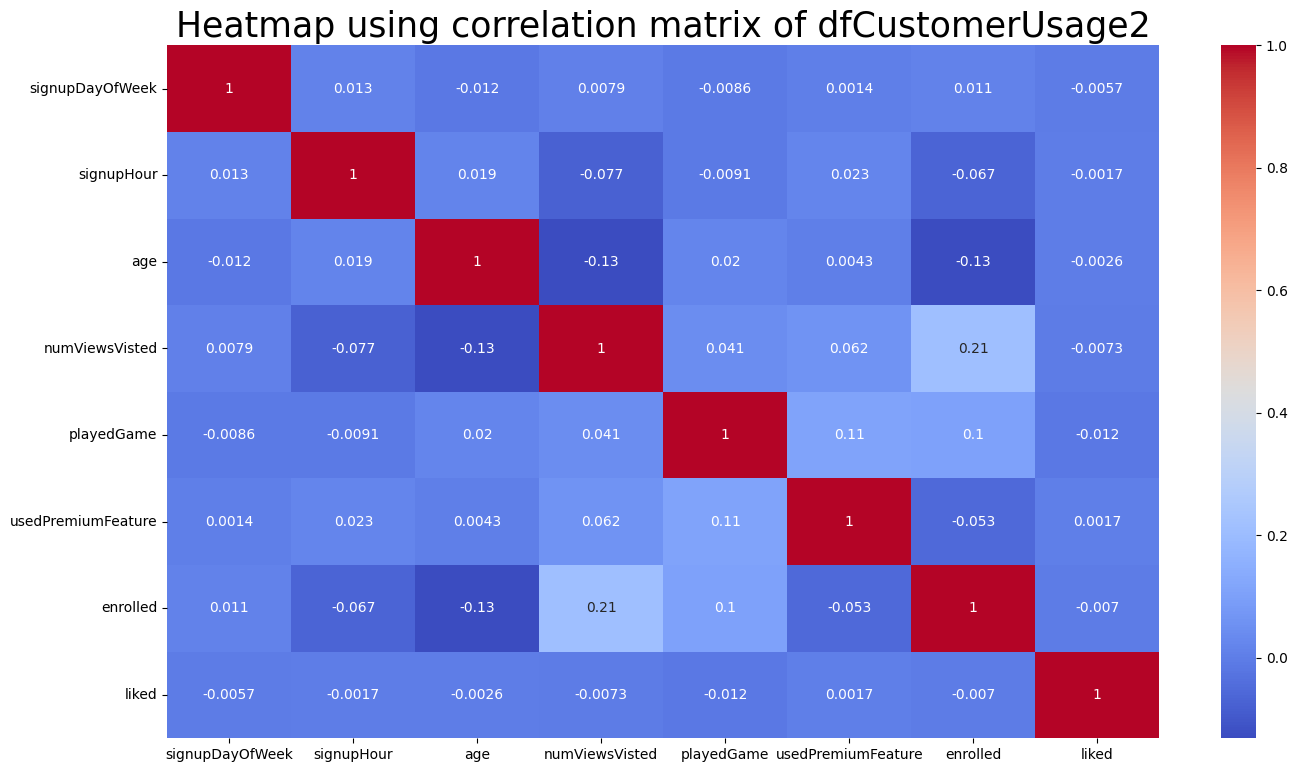

In [28]:
# Heatmap
plt.figure(figsize=(16,9)) # heatmap size in ratio 16:9

sns.heatmap(dfCustomerUsage2.corr(), annot = True, cmap ='coolwarm') # show heatmap

plt.title("Heatmap using correlation matrix of dfCustomerUsage2", fontsize = 25) # title of heatmap 

## Pairplot of dfCustomerUsage2

This step took 5 minutes to run on my computer

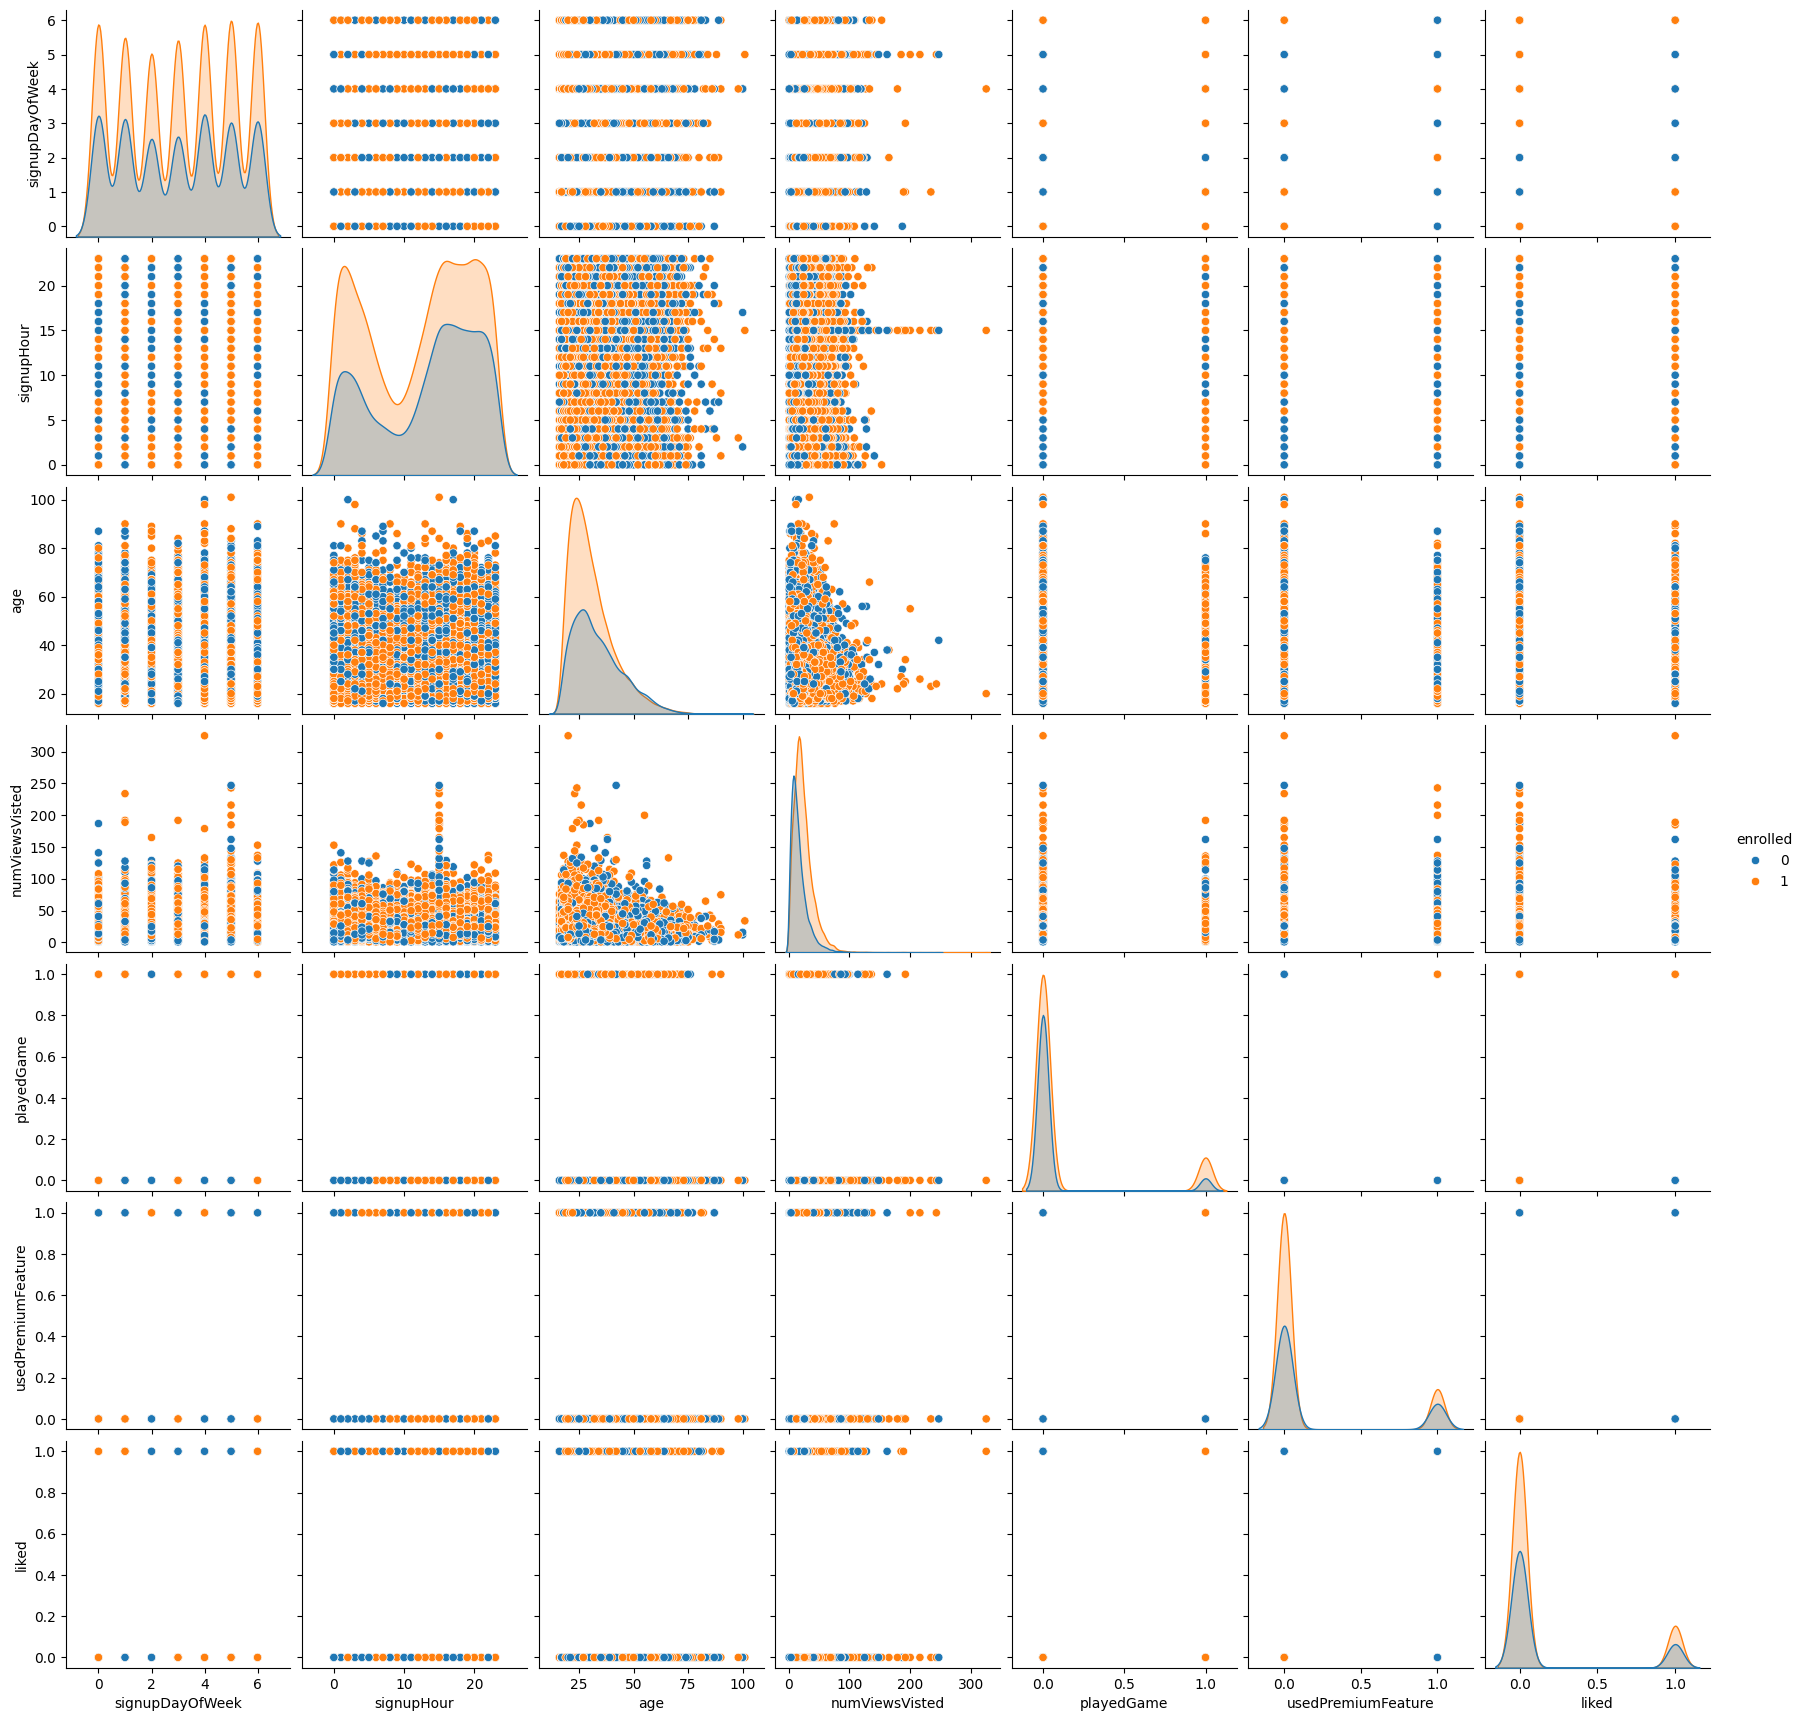

In [29]:
# Pailplot of fineTech_appData2 Dataset

sns.pairplot(dfCustomerUsage2, hue  = 'enrolled') # 

## Countplot of enrolled

### Q6 - Plot histogram (count plot) with x-axis= 'enrolled' grouped by feature 'liked'

<Axes: xlabel='enrolled', ylabel='count'>

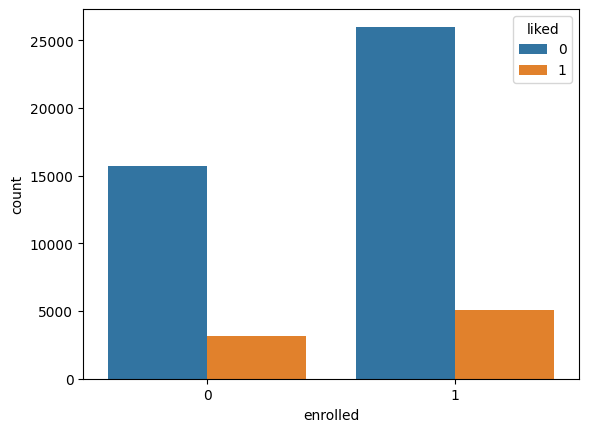

In [30]:
# Show counterplot of 'enrolled' feature
sns.countplot(x = dfCustomerUsage2.enrolled, hue = dfCustomerUsage2.liked)

In [31]:
# value enrolled and not enrolled customers
print("Not enrolled user = ", (dfCustomerUsage.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(dfCustomerUsage.enrolled < 1).sum(),  "out of 50000")

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


## Histogram of each feature of dfCustomerUsage2

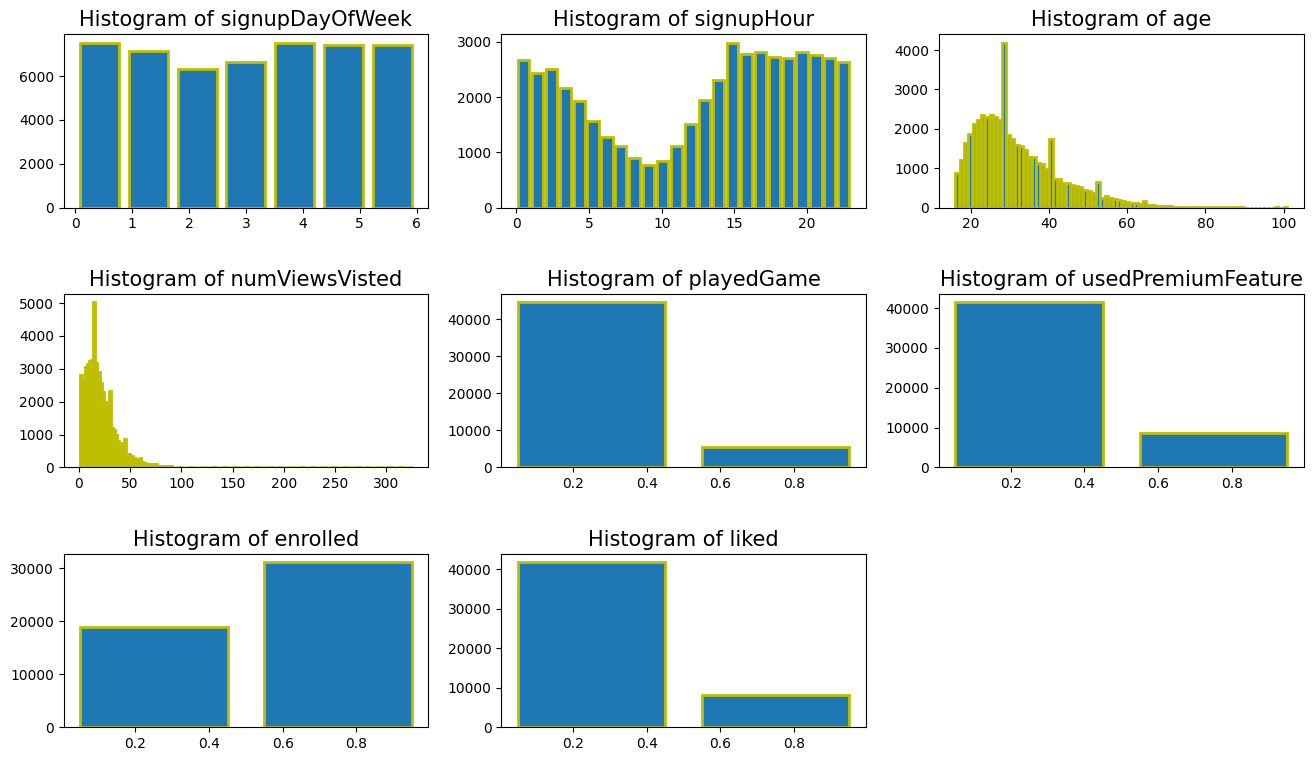

In [32]:
# plot histogram 

plt.figure(figsize = (16,9)) # figure size in ratio 16:9
features = dfCustomerUsage2.columns # list of columns name
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
    
    bins = len(dfCustomerUsage2[j].unique()) # bins for histogram
    plt.hist(dfCustomerUsage2[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
    
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots) 

In [33]:
for i,j in enumerate(features):
    print(i,j)

0 signupDayOfWeek
1 signupHour
2 age
3 numViewsVisted
4 playedGame
5 usedPremiumFeature
6 enrolled
7 liked


## Correlation barplot with 'enrolled' feature

### Q7 - Plot barPlot of correlation of above 7 features to 'enrolled'

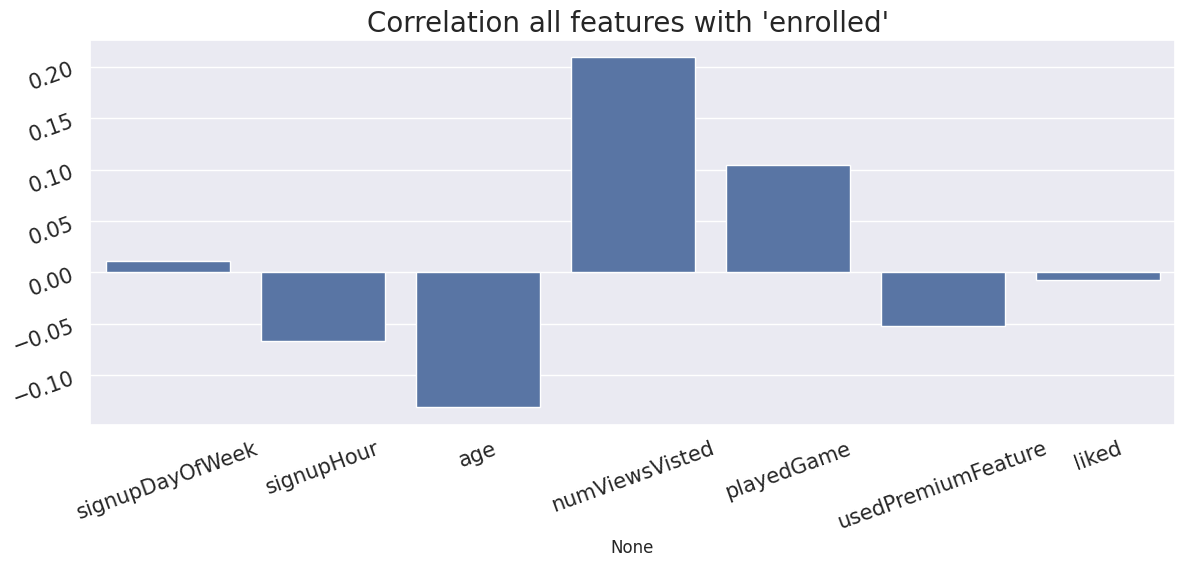

In [34]:
# show corelation barplot 

sns.set() # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
dfCustomerUsage3 = dfCustomerUsage2.drop(['enrolled'], axis = 1) # drop 'enrolled' feature
dctEnrolledCorr =  dfCustomerUsage3.corrwith(dfCustomerUsage2['enrolled'])


ax =sns.barplot(x=dctEnrolledCorr.keys(), y=dctEnrolledCorr.values) # plot barplot 
ax.tick_params(labelsize=15, labelrotation = 20, color ="r") # decorate x & y ticks font 

In [35]:
# parsing object data into data time format

##### dfCustomerUsage['signupDate'] =[parser.parse(i) for i in dfCustomerUsage['signupDate']]


In [36]:
##### dfCustomerUsage['enrollmentDate'] =[parser.parse(i) if isinstance(i, str) else i for i in dfCustomerUsage['enrollmentDate']]

In [37]:
dfCustomerUsage.dtypes

userid                          int64
signupDate             datetime64[ns]
signupDayOfWeek                 int64
signupHour                      int64
age                             int64
viewsVisited                   object
numViewsVisted                  int64
playedGame                      int64
usedPremiumFeature              int64
enrolled                        int64
enrollmentDate         datetime64[ns]
liked                           int64
timeToEnrollment      timedelta64[ns]
average_time_delta    timedelta64[ns]
dtype: object

In [38]:
dfCustomerUsage['timeToEnrollment']  = (dfCustomerUsage.enrollmentDate - dfCustomerUsage.signupDate).values.astype('timedelta64[s]')

In [39]:
dfCustomerUsage['timeToEnrollment']

0                   NaT
1                   NaT
2                   NaT
3       0 days 00:03:03
4       0 days 00:05:49
              ...      
49995   0 days 00:01:35
49996               NaT
49997               NaT
49998   0 days 00:02:34
49999               NaT
Name: timeToEnrollment, Length: 50000, dtype: timedelta64[s]

### Q8 - Plot histogram of timeToErollment feature

(array([2.8195e+04, 1.0320e+03, 5.6600e+02, 4.2600e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0.        ,  543.46869444, 1086.93738889, 1630.40608333,
        2173.87477778, 2717.34347222, 3260.81216667, 3804.28086111,
        4347.74955556, 4891.21825   , 5434.68694444]),
 <BarContainer object of 10 artists>)

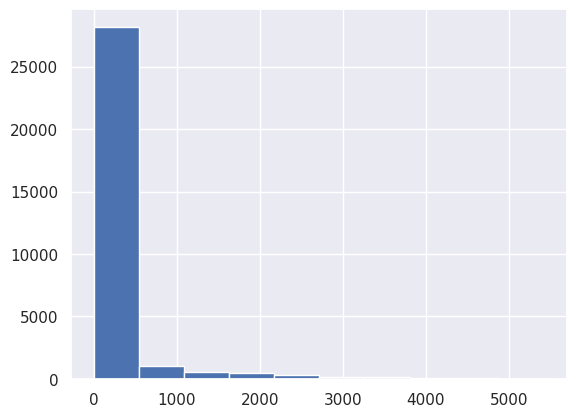

In [40]:
# plot histogram
plt.hist(dfCustomerUsage['timeToEnrollment'].dropna().values.astype("float64")/3600)

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   178.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

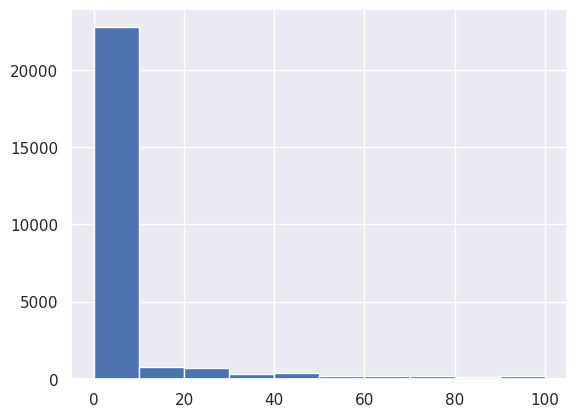

In [41]:
# Plot histogram
plt.hist(dfCustomerUsage['timeToEnrollment'].dropna().values.astype("float64")/3600, range = (0,100)) # 

In [42]:
# Those customers have enrolled after 48 hours set as 0
dfCustomerUsage['timeToEnrollment'] = dfCustomerUsage['timeToEnrollment'].values.astype("float64")/3600
dfCustomerUsage.loc[dfCustomerUsage.timeToEnrollment > 48, 'enrolled'] = 0

In [43]:
dfCustomerUsage

,userid,signupDate,signupDayOfWeek,signupHour,age,viewsVisited,numViewsVisted,playedGame,usedPremiumFeature,enrolled,enrollmentDate,liked,timeToEnrollment,average_time_delta
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,-2.562048e+15,NaT
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,-2.562048e+15,NaT
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,-2.562048e+15,NaT
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,5.083333e-02,0 days 00:00:00.002119895
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,9.694444e-02,0 days 00:00:00.004041435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0,2.638889e-02,0 days 00:00:00.001099583
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaT,0,-2.562048e+15,NaT
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,-2.562048e+15,NaT
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0,4.277778e-02,0 days 00:00:00.001787280


### - Q9 - Keep below columns and remove the rest from dfCustomerUsage
- userid             -     int64
- signupDayOfWeek    -    int64
- signupHour         -     int32
- age                -     int64
- viewsVisited       -    object
- numViewsVisted     -     int64
- playedGame         -     int64
- usedPremiumFeature -     int64
- enrolled           -     int64
- liked              -     int64

In [44]:
dfCustomerUsage = dfCustomerUsage.drop(['signupDate', 'enrollmentDate','timeToEnrollment','average_time_delta'], axis = 1)

In [45]:
dfCustomerUsage.dtypes

userid                 int64
signupDayOfWeek        int64
signupHour             int64
age                    int64
viewsVisited          object
numViewsVisted         int64
playedGame             int64
usedPremiumFeature     int64
enrolled               int64
liked                  int64
dtype: object

In [46]:
dfCustomerUsage

,userid,signupDayOfWeek,signupHour,age,viewsVisited,numViewsVisted,playedGame,usedPremiumFeature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


### Q10 - Find the userid with maximum number of  'viewsVisited'

In [47]:
dfCustomerUsage.rename(columns={"numViewsVisted": "numViewsVisited"}, inplace = True)

In [48]:
dfCustomerUsage[dfCustomerUsage['numViewsVisited']==dfCustomerUsage['numViewsVisited'].max()]

,userid,signupDayOfWeek,signupHour,age,viewsVisited,numViewsVisited,playedGame,usedPremiumFeature,enrolled,liked
27660,73887,4,15,20,"Credit3Dashboard,Credit3Container,Home,Communi...",325,0,0,1,1


### Q11 - How many distinct Views or Screen has the user identified in Q10 visited? List the viewNames

In [49]:
pd.set_option('display.max_colwidth',5000)
listViews = dfCustomerUsage.loc[dfCustomerUsage['userid'] == 73887].viewsVisited.to_string(index = False).split(",") #Not quite - dups
len(listViews)




79

In [50]:
len(set(listViews))

64

In [51]:
set(listViews)

{'About',
 'AccountView',
 'Alerts',
 'BankVerification',
 'CC1',
 'CC1Category',
 'CameraScreen',
 'CommunityAndInvites',
 'Credit1',
 'Credit2',
 'Credit3Container',
 'Credit3Dashboard',
 'Cycle',
 'EditProfile',
 'FindFriendsCycle',
 'GroupedInstitutions',
 'History',
 'Home',
 'Institutions',
 'ListPicker',
 'Loan1',
 'Loan2',
 'Loan4',
 'LoanAppPaymentSchedule',
 'MLWebView',
 'ProfileChildren',
 'ProfileCompanyName',
 'ProfileEducation',
 'ProfileEducationMajor',
 'ProfileEmploymentLength',
 'ProfileJobTitle',
 'ProfileMaritalStatus',
 'ProfilePage',
 'ProfileVerifyIncomeType',
 'RewardDetail',
 'Rewardjoinscreen',
 'RewardsContainer',
 'Saving1',
 'Saving10',
 'Saving2',
 'Saving2Amount',
 'Saving4',
 'Saving5',
 'Saving6',
 'Saving7',
 'Saving8',
 'Saving9',
 'SavingGoalPreview',
 'ScanPreview',
 'SelectInstitution',
 'Settings',
 'TransactionList',
 'VerifyCountry',
 'VerifyDateOfBirth',
 'VerifyMobile',
 'VerifyPhone',
 'VerifySSN',
 'VerifyToken',
 'YourNetwork',
 'idscreen'

### Q12 - Count the number of users who has visited a view with the word 'Splash' in the viewName

In [52]:
print("num of users visited 'Splash' screen:", dfCustomerUsage.viewsVisited.str.contains('Splash').astype(int).sum())

num of users visited 'Splash' screen: 10038


In [53]:
dfCustomerUsage.viewsVisited.str.contains('Splash').astype(int).sum()

10038

### Q13 - How many distinct viewNames are in 'viewVisited' column across all users?

In [54]:
# convert comma-separated strings to lists
dfCustomerUsage['listofViews'] = dfCustomerUsage.viewsVisited.apply(lambda x: x.split(","))

# create a set of unique values
unique_set = dfCustomerUsage['listofViews'].apply(pd.Series).stack().unique()



# sort the set
sorted_set = sorted(unique_set)

# print the set
print(sorted_set)

len(sorted_set)

['About', 'AccountView', 'AddProperty', 'AddVehicle', 'AdverseActions', 'Alerts', 'BVPlaidLinkContainer', 'BVStats', 'BankVerification', 'BoostFriendsList', 'CC1', 'CC1Category', 'CC3', 'CameraScreen', 'CommunityAndInvites', 'ContactInfoConfirm', 'Credit1', 'Credit2', 'Credit3', 'Credit3Alerts', 'Credit3CTA', 'Credit3Container', 'Credit3Dashboard', 'Credits', 'Cycle', 'EditProfile', 'EmploymentInfo', 'EmploymentSummary', 'Finances', 'FindFriendsCycle', 'ForgotPassword', 'GroupedInstitutions', 'History', 'Home', 'IdAndSelfieCameraScreen', 'IdentityVerification', 'InstantLoanSSN', 'InstantOfferCreateAccount', 'Institutions', 'LLLoanAmount', 'LandingScreen', 'Leaderboard', 'ListPicker', 'Loan', 'Loan1', 'Loan2', 'Loan3', 'Loan4', 'LoanAppAgreement', 'LoanAppBankInfo', 'LoanAppConfirmWithdrawal', 'LoanAppDenied', 'LoanAppESign', 'LoanAppLoan4', 'LoanAppPaymentSchedule', 'LoanAppPromoCode', 'LoanAppReasons', 'LoanAppRequestAmount', 'LoanAppScheduleCall', 'LoanAppSuccess', 'LoanAppVerifyBank

137

In [55]:
dfCustomerUsage.drop('listofViews', axis = 1, inplace = True)
pd.set_option('display.max_colwidth',50)

### Load top views (screens) in the app

In [56]:
# read csv file and convert it into numpy array
ndViews = pd.read_csv("TopViews.csv").top_views.values

In [57]:
ndViews

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [58]:
type(ndViews)

numpy.ndarray

In [59]:
# Add ',' at the end of each string of  'viewsVisited' for further operation.
dfCustomerUsage['viewsVisited'] = dfCustomerUsage.viewsVisited.astype(str) + ','

In [60]:
dfCustomerUsage

,userid,signupDayOfWeek,signupHour,age,viewsVisited,numViewsVisited,playedGame,usedPremiumFeature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer,",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [61]:
dfCustomerUsage.iloc[2,:]

userid                            254414
signupDayOfWeek                        1
signupHour                            19
age                                   23
viewsVisited          Splash,Cycle,Loan,
numViewsVisited                        3
playedGame                             0
usedPremiumFeature                     1
enrolled                               0
liked                                  1
Name: 2, dtype: object

## Add viewsVisited (screen names) as feature columns

In [62]:
# string into to number

for viewName in ndViews:
    dfCustomerUsage[viewName] = dfCustomerUsage.viewsVisited.str.contains(viewName).astype(int)
    dfCustomerUsage['viewsVisited'] = dfCustomerUsage.viewsVisited.str.replace(viewName+",", "")

In [63]:
dfCustomerUsage.iloc[2,:]

userid             254414
signupDayOfWeek         1
signupHour             19
age                    23
viewsVisited             
                    ...  
Loan4                   0
ResendToken             0
TransactionList         0
NetworkFailure          0
ListPicker              0
Name: 2, Length: 68, dtype: object

In [64]:
dfCustomerUsage.shape

(50000, 68)

In [65]:
dfCustomerUsage['viewsVisited']

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
                               ...                        
49995    Home,ScanPreview,VerifySSN,product_review,prod...
49996                                                Home,
49997    joinscreen,product_review,product_review2,Scan...
49998    Home,product_review,product_review,product_rev...
49999    product_review,ScanPreview,ProfileVerifySSN,Home,
Name: viewsVisited, Length: 50000, dtype: object

In [66]:
dfCustomerUsage.loc[107,'viewsVisited']

''

### Q14 - Count the number of users who have visited only Top Views?

In [67]:
#dfCustomerUsage['viewsVisited']

In [68]:
# those that were added as columns were replaced by empty string. So we can count the number of rows that have empty strings only for the viewsVisited column
len(dfCustomerUsage.loc[dfCustomerUsage['viewsVisited'] == ''])

755

In [69]:
dfCustomerUsage.loc[dfCustomerUsage['viewsVisited'] == '']

,userid,signupDayOfWeek,signupHour,age,viewsVisited,numViewsVisited,playedGame,usedPremiumFeature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
107,54898,6,11,20,,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,135746,3,23,36,,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
202,67270,5,16,23,,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,294403,5,5,25,,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49694,341707,4,7,18,,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
49712,88488,5,17,38,,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49790,224221,1,23,41,,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49824,259497,5,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Check for Nulls

In [70]:
(dfCustomerUsage.isnull().sum(axis = 0))

userid             0
signupDayOfWeek    0
signupHour         0
age                0
viewsVisited       0
                  ..
Loan4              0
ResendToken        0
TransactionList    0
NetworkFailure     0
ListPicker         0
Length: 68, dtype: int64

In [71]:
# test
dfCustomerUsage.dropna().viewsVisited.str.contains('Splash').astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: viewsVisited, Length: 50000, dtype: int64

In [72]:
# get shape
dfCustomerUsage.shape

(50000, 68)

In [73]:
# head of DataFrame
dfCustomerUsage.head(6) # 

,userid,signupDayOfWeek,signupHour,age,viewsVisited,numViewsVisited,playedGame,usedPremiumFeature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# other views (not Top Views) screen in 'viewsVisited'
dfCustomerUsage.loc[0,'viewsVisited']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [75]:
dfCustomerUsage.viewsVisited.str.count(",").head(6)

0     7
1     5
2     0
3     6
4    10
5     6
Name: viewsVisited, dtype: int64

In [76]:
# count non-Top Views list and store counted number in 'remain_view_list'

dfCustomerUsage['nonTopViews'] = dfCustomerUsage.viewsVisited.str.count(",")

In [77]:
# Drop the 'screen_list'
dfCustomerUsage.drop(columns = ['viewsVisited'], inplace=True)

In [78]:
dfCustomerUsage

,userid,signupDayOfWeek,signupHour,age,numViewsVisited,playedGame,usedPremiumFeature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,nonTopViews
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13


In [79]:
# total columns
dfCustomerUsage.columns

Index(['userid', 'signupDayOfWeek', 'signupHour', 'age', 'numViewsVisited',
       'playedGame', 'usedPremiumFeature', 'enrolled', 'liked', 'Loan2',
       'location', 'Institutions', 'Credit3Container', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category',
       'Splash', 'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1',
       'EditProfile', 'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1',
       'Alerts', 'Saving8', 'Saving10', 'Leaderboard', 'Saving4',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', '

In [80]:
# take sum of all saving screens into a single Column one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
dfCustomerUsage['savingScreensCount'] = dfCustomerUsage[saving_screens].sum(axis = 1)
dfCustomerUsage.drop(columns = saving_screens, inplace = True)

In [81]:
dfCustomerUsage

,userid,signupDayOfWeek,signupHour,age,numViewsVisited,playedGame,usedPremiumFeature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,nonTopViews,savingScreensCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,1,0,0,0,0,0,0,6,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,13,0


In [82]:
# take sum of all credit screens into a single Column one place
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
dfCustomerUsage['creditScreensCount'] = dfCustomerUsage[credit_screens].sum(axis = 1)
dfCustomerUsage.drop(columns = credit_screens, axis = 1, inplace = True)

In [83]:
dfCustomerUsage

,userid,signupDayOfWeek,signupHour,age,numViewsVisited,playedGame,usedPremiumFeature,enrolled,liked,Loan2,...,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,nonTopViews,savingScreensCount,creditScreensCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,7,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,5,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,6,0,3
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,1,0,0,0,0,0,0,6,0,2
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,13,0,0


In [84]:
# take sum of all credit card screen into a single Column one place
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
dfCustomerUsage['ccScreensCount'] = dfCustomerUsage[cc_screens].sum(axis = 1)
dfCustomerUsage.drop(columns = cc_screens, inplace = True)

In [85]:
dfCustomerUsage

,userid,signupDayOfWeek,signupHour,age,numViewsVisited,playedGame,usedPremiumFeature,enrolled,liked,Loan2,...,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,nonTopViews,savingScreensCount,creditScreensCount,ccScreensCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,7,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,6,0,3,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,0,6,0,2,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,13,0,0,0


### Q15 - Combine the sum of 4 Loan columns (Loan, Loan2, Loan3,Loan4) into a single column named loanScreenCounts

In [86]:
# take sum of all loan screen into a single Column one place
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4']
dfCustomerUsage['loadScreenCounts'] = dfCustomerUsage[loan_screens].sum(axis = 1)
dfCustomerUsage.drop(columns = loan_screens, inplace = True)


In [87]:
dfCustomerUsage

,userid,signupDayOfWeek,signupHour,age,numViewsVisited,playedGame,usedPremiumFeature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,nonTopViews,savingScreensCount,creditScreensCount,ccScreensCount,loadScreenCounts
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


In [88]:
dfCustomerUsage.shape

(50000, 50)

In [89]:
dfCustomerUsage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   userid                   50000 non-null  int64
 1   signupDayOfWeek          50000 non-null  int64
 2   signupHour               50000 non-null  int64
 3   age                      50000 non-null  int64
 4   numViewsVisited          50000 non-null  int64
 5   playedGame               50000 non-null  int64
 6   usedPremiumFeature       50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int64
 10  Institutions             50000 non-null  int64
 11  VerifyPhone              50000 non-null  int64
 12  BankVerification         50000 non-null  int64
 13  VerifyDateOfBirth        50000 non-null  int64
 14  ProfilePage              50000 non-null  int64
 15  Ve

In [90]:
dfCustomerUsage.describe()

,userid,signupDayOfWeek,signupHour,age,numViewsVisited,playedGame,usedPremiumFeature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,nonTopViews,savingScreensCount,creditScreensCount,ccScreensCount,loadScreenCounts
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.495760,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.168100,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499987,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.651886,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,34.000000,10.000000,5.00000,3.000000,3.000000


## Heatmap with correlation matrix of new dfCustomerUsage Features

<Axes: >

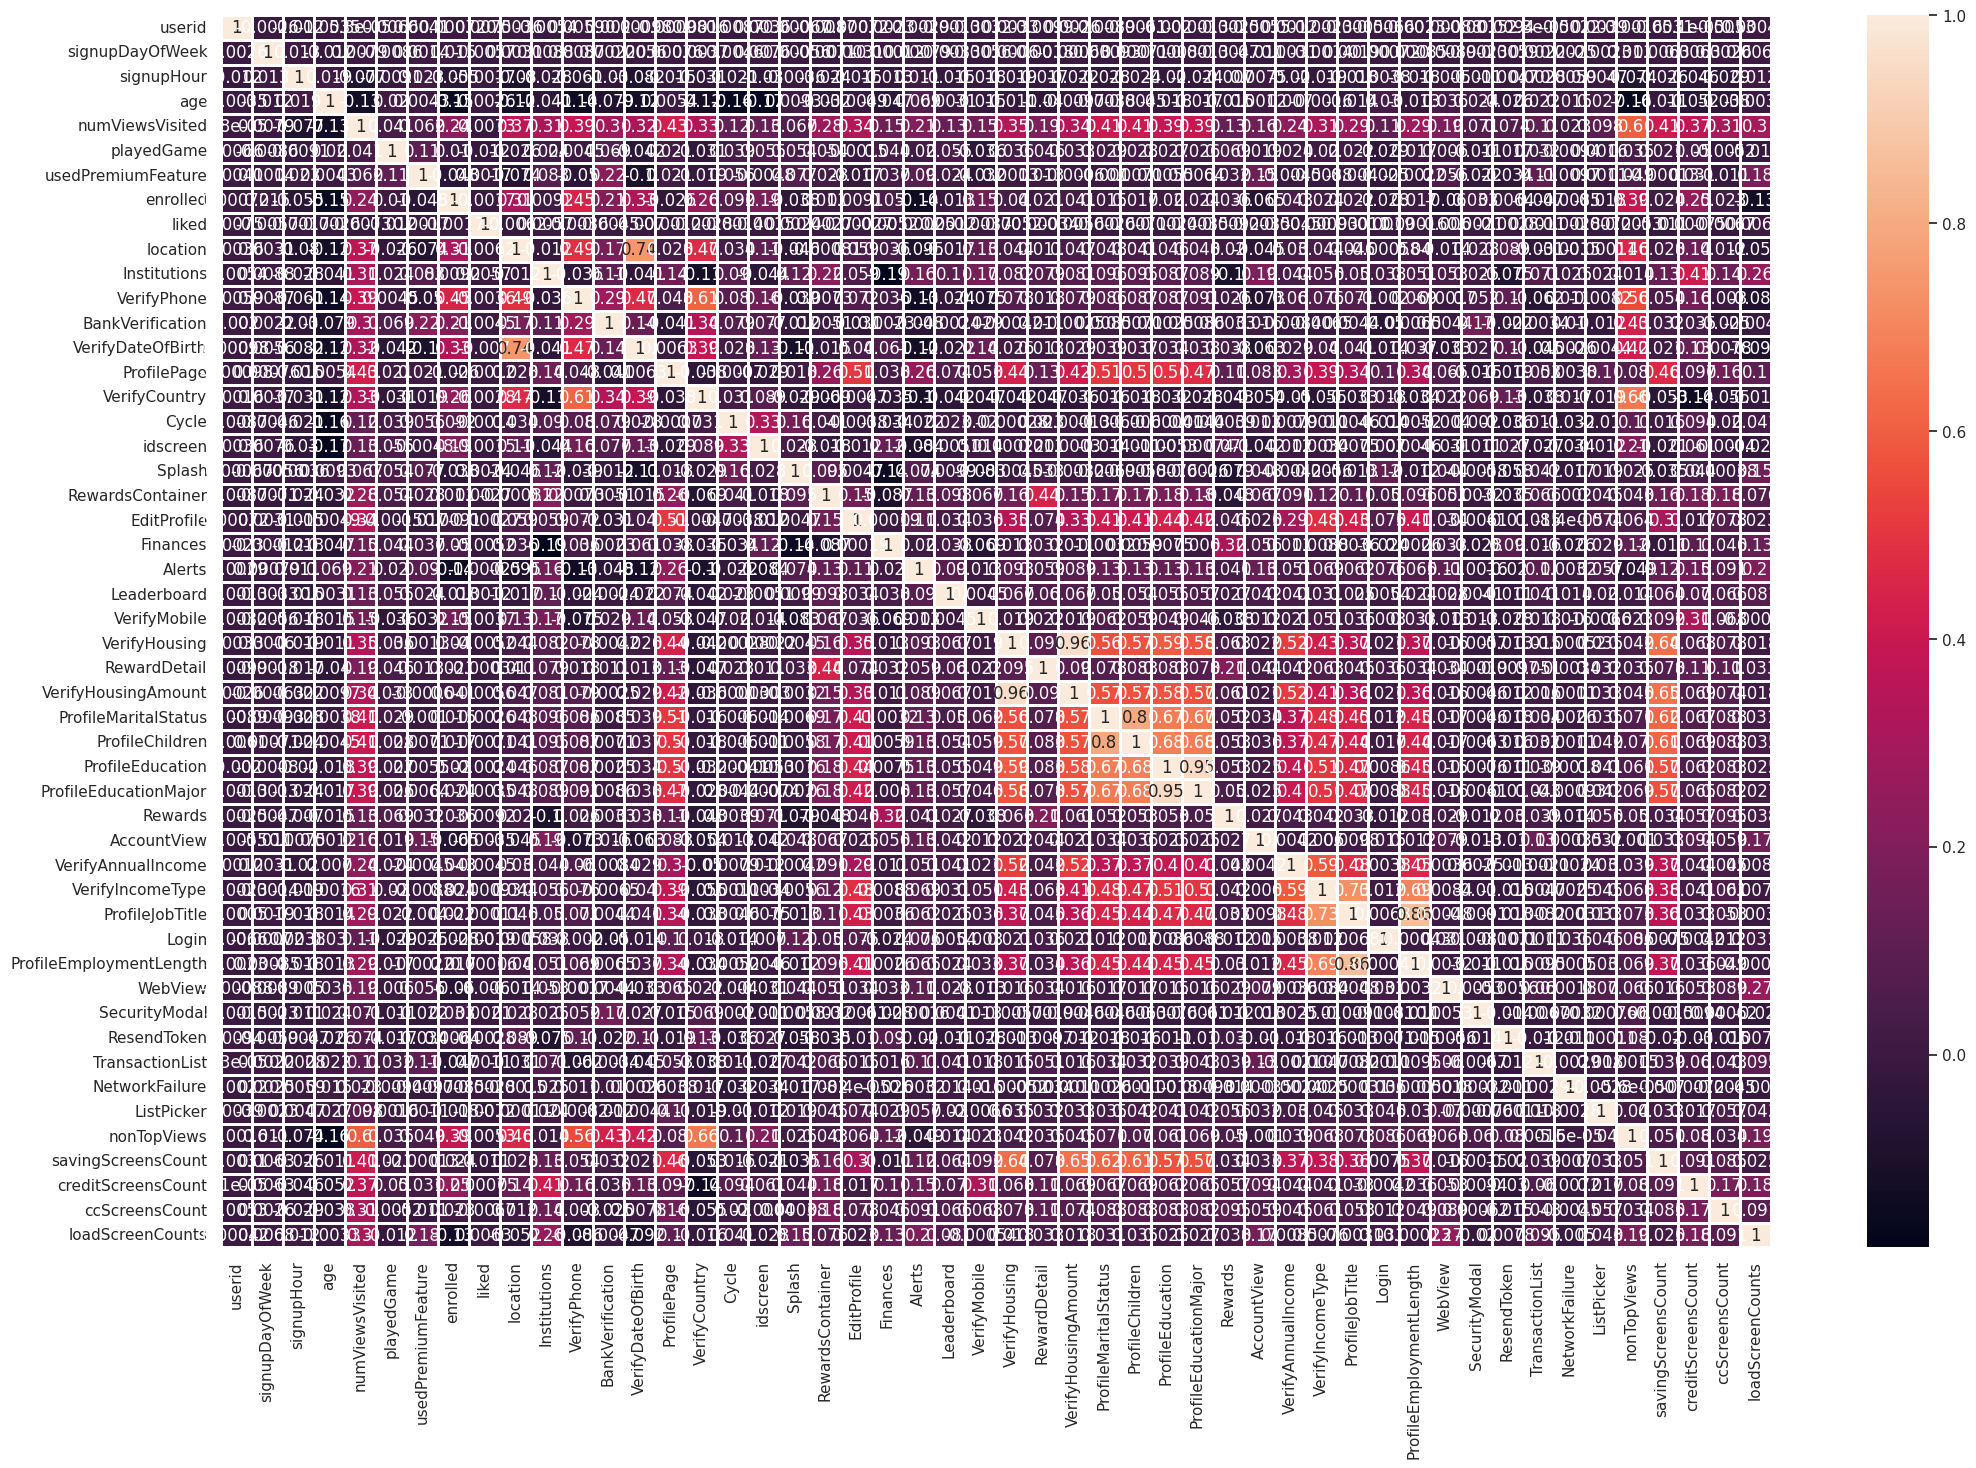

In [91]:
# Heatmap with correlation matrix of new fineTech_appData

plt.figure(figsize = (25,16)) 
sns.heatmap(dfCustomerUsage.corr(numeric_only=True), annot = True, linewidth =2) #

In [92]:
dfCustomerUsage.columns

Index(['userid', 'signupDayOfWeek', 'signupHour', 'age', 'numViewsVisited',
       'playedGame', 'usedPremiumFeature', 'enrolled', 'liked', 'location',
       'Institutions', 'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen', 'Splash',
       'RewardsContainer', 'EditProfile', 'Finances', 'Alerts', 'Leaderboard',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'nonTopViews',
       'savingScreensCount', 'creditScreensCount', 'ccScreensCount',
       'loadScreenCounts'],
      dtype='object')

In [93]:
dfCustomerUsage['ProfileChildren'].unique()

array([0, 1])

In [94]:
corr_matrix = dfCustomerUsage.corr(numeric_only=True)
corr_matrix['ProfileChildren']

userid                    -0.006135
signupDayOfWeek            0.000708
signupHour                -0.023785
age                       -0.004472
numViewsVisited            0.406450
playedGame                 0.027705
usedPremiumFeature         0.007066
enrolled                   0.016735
liked                     -0.007144
location                   0.041395
Institutions               0.095062
VerifyPhone                0.087457
BankVerification           0.007052
VerifyDateOfBirth          0.036501
ProfilePage                0.503055
VerifyCountry             -0.018261
Cycle                     -0.005959
idscreen                  -0.011330
Splash                    -0.005795
RewardsContainer           0.169446
EditProfile                0.405393
Finances                   0.005860
Alerts                     0.131257
Leaderboard                0.054368
VerifyMobile               0.058982
VerifyHousing              0.572383
RewardDetail               0.082945
VerifyHousingAmount        0

In [95]:
dfCustomerUsage['ProfileChildren']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: ProfileChildren, Length: 50000, dtype: int64

### Q16 - Save the feature set in CSV file name CustomerUsageCleaned.csv 
### Submit CustomerUsageCleaned.csv along with this complete notebook

In [97]:
#Save dataframe to file
dfCustomerUsage.to_csv('CustomerUsageCleaned.csv', index = False)

# Data Preprocessing

## Split dataset in Train and Test

In [98]:
dfCustomerUsage = pd.read_csv('CustomerUsageFeature.csv')
target = dfCustomerUsage['enrolled'] 
dfCustomerUsage.drop(columns = 'enrolled', inplace = True)

### Q17 - Create X_train, X_val, y_train, y_val with split size of 80:20

In [99]:
from sklearn.model_selection import train_test_split

#Split dataset
X_train, X_val, y_train, y_val =  train_test_split(dfCustomerUsage, target, test_size = 0.2)

In [100]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_val = ', X_val.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_val = ', y_val.shape)

Shape of X_train =  (40000, 50)
Shape of X_val =  (10000, 50)
Shape of y_train =  (40000,)
Shape of y_val =  (10000,)


In [101]:
# take User ID in another variable 
train_userID = X_train['userid']
X_train.drop(columns= 'userid', inplace =True)
val_userID = X_val['userid']
X_val.drop(columns= 'userid', inplace =True)

In [102]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_val = ', X_val.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of val_userID = ', val_userID.shape)


Shape of X_train =  (40000, 49)
Shape of X_val =  (10000, 49)
Shape of train_userID =  (40000,)
Shape of val_userID =  (10000,)


# Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc = sc.transform(X_val)

In [104]:
X_train_sc

array([[-1.69747783,  1.46034092,  1.40104157, ...,  1.70649745,
        -0.28813694,  0.31566597],
       [-0.70278865, -0.51047942,  1.13227788, ...,  2.52910408,
        -0.28813694, -1.16217096],
       [ 0.18798812, -0.51047942,  0.72913236, ..., -0.76132244,
        -0.28813694,  0.31566597],
       ...,
       [-0.91525797,  0.96763584, -0.48030422, ...,  0.06128419,
        -0.28813694,  0.31566597],
       [ 0.18819608, -1.49588959, -1.55535895, ..., -0.76132244,
        -0.28813694,  0.31566597],
       [-1.6727995 , -1.49588959, -1.28659527, ..., -0.76132244,
        -0.28813694,  0.31566597]])

# Model Building

In [105]:
# impoer requiede packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

# Decision Tree

In [106]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)

accuracy_score(y_val, y_pred_dt)

0.6942

In [107]:
# train with Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_val_sc)

accuracy_score(y_val, y_pred_dt_sc)

0.6936

# K-NN

### Q18 - Train X-train, y_train  using KNeighboursClassifier and print accuracy_score

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_val)

accuracy_score(y_val, y_pred_knn)

0.5779

In [109]:
#### pip install --upgrade threadpoolctl

In [110]:
# train with Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_val_sc)

accuracy_score(y_val, y_pred_knn_sc)

0.7338

# Naive Bayes

In [111]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)

accuracy_score(y_val, y_pred_nb)

0.7265

In [112]:
# train with Scaling dataset
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_val_sc)

accuracy_score(y_val, y_pred_nb_sc)

0.7139

# Random Forest

In [113]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

accuracy_score(y_val, y_pred_rf)

0.761

In [114]:
# train with Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_val_sc)

accuracy_score(y_val, y_pred_rf_sc)

0.7619

# Logistic Regression

In [115]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)

accuracy_score(y_val, y_pred_lr)

/home/jupyter-linbbn/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6875

In [116]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_val_sc)

accuracy_score(y_val, y_pred_lr_sc)

0.765

# Support Vector Machine

In [117]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_val)

accuracy_score(y_val, y_pred_svc)

0.5022

In [118]:
# train with Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_val_sc)

accuracy_score(y_val, y_pred_svc_sc)

0.7775

# XGBoost

In [119]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)

accuracy_score(y_val, y_pred_xgb)

0.7804

In [120]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_val_sc)

accuracy_score(y_val, y_pred_xgb_sc)

0.7804

In [121]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_val)

accuracy_score(y_val, y_pred_xgb_pt1)

0.786

In [122]:
# XGB classifier with parameter tuning
# train with Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_val_sc)

accuracy_score(y_val, y_pred_xgb_sc_pt2)

0.786

### Q19 - Plot the Confusion Matrix

[[4049  973]
 [1167 3811]]


<Axes: >

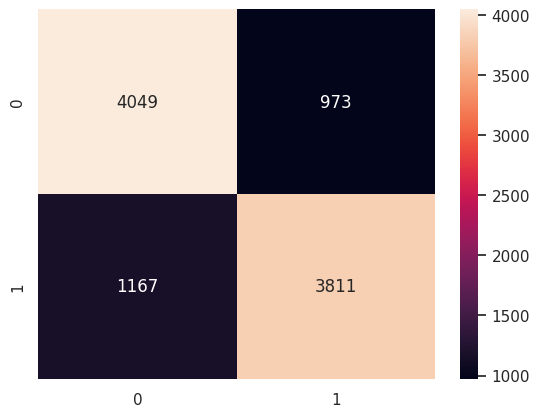

In [123]:
# confussion matrix
cm_xgb_pt2 = confusion_matrix(y_val, y_pred_xgb_sc_pt2)
#cmatrix = ConfusionMatrixDisplay(cm_xgb_pt2)
print(cm_xgb_pt2)
sns.heatmap(cm_xgb_pt2, annot = True,fmt='d')

In [124]:
# Clasification Report
cr_xgb_pt2 = classification_report(y_val, y_pred_xgb_sc_pt2)

print("Classification report >>> \n", cr_xgb_pt2)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      5022
           1       0.80      0.77      0.78      4978

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



This step took 5 minutes on my computer

In [125]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())

Cross validation of XGBoost model =  [0.7875  0.78875 0.7755  0.784   0.79375 0.78425 0.78825 0.78525 0.78625
 0.788  ]
Cross validation of XGBoost model (in mean) =  0.78615


# Mapping predicted output to the target

In [126]:
type(val_userID)

pandas.core.series.Series

In [127]:
val_userID

7824     102049
27351    184176
42426    216377
12507     73828
49105    266620
          ...  
37221     59712
12545    206933
3111     149060
45914    218261
18696    113246
Name: userid, Length: 10000, dtype: int64

In [128]:
type(y_val)

pandas.core.series.Series

In [129]:
y_val

7824     1
27351    1
42426    1
12507    0
49105    0
        ..
37221    0
12545    0
3111     1
45914    0
18696    1
Name: enrolled, Length: 10000, dtype: int64

In [130]:
type(y_pred_xgb_sc_pt2)

numpy.ndarray

In [131]:
y_pred_xgb_sc_pt2

array([1, 0, 1, ..., 0, 1, 1])

### Q20 - Concatenate 3 columns - val_userID, y_val & y_pred_xgb_sc_pt2 into a dataframe dfFinalResult

In [132]:
y_pred_xgb_sc_pt2 = pd.Series(y_pred_xgb_sc_pt2, name = 'predicted result', index = y_val.index)

dfFinalResult = pd.concat([val_userID, y_val, y_pred_xgb_sc_pt2],  axis=1)


dfFinalResult

,userid,enrolled,predicted result
7824,102049,1,1
27351,184176,1,0
42426,216377,1,1
12507,73828,0,0
49105,266620,0,0
...,...,...,...
37221,59712,0,0
12545,206933,0,0
3111,149060,1,0
45914,218261,0,1


# Save the Model

### Q21 - Load the pickled Model to predict

In [133]:
## Pickle
import pickle

# save model
pickle.dump(xgb_model_pt2, open('CustomerBehavior_Model.pickle', 'wb'))

# load model
ml_model_pl = pickle.load(open('CustomerBehavior_Model.pickle','rb'))

# predict the output
y_pred_pl = ml_model_pl.predict(X_val_sc)

# confusion matrix
cm_pl = confusion_matrix(y_val, y_pred_pl)
print('Confussion matrix = \n', cm_pl)

# show the accuracy
print("Accuracy of model = ",accuracy_score(y_val, y_pred_pl))


Confussion matrix = 
 [[4049  973]
 [1167 3811]]
Accuracy of model =  0.786


### Q22 - Assess Model using y_val, y_pred_pl

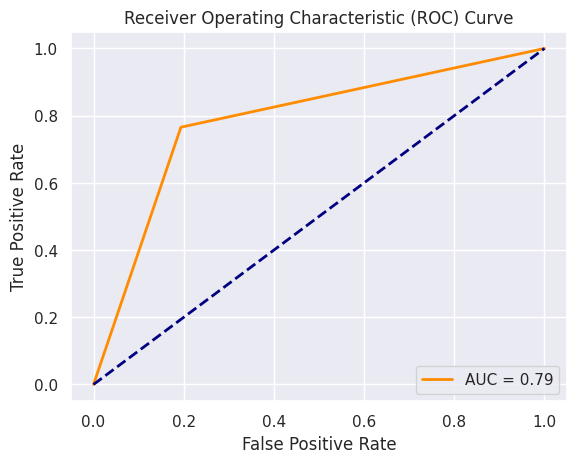

In [134]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_pl)
auc = roc_auc_score(y_val, y_pred_pl)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()